# **Introduction**

In the financial industry, it is crucial for lenders to assess the
creditworthiness of borrowers before granting loans or credit. Identifying
potential defaulters, who are at higher risk of failing to repay their debts,
can help mitigate financial losses and maintain a healthy lending portfolio.
The goal of this project is to develop a predictive model that can
accurately classify borrowers as defaulters or non-defaulters based on
various financial and demographic factors.




Project Finance - Predictive Analysis:
To create a machine learning model to predict the
defaulter and Non-defaulter by analyzing historical data.


Below are the contents that we will be implementing into creating the desired
Machine Learning Model to predict Defaulters and Non-defaulters along with describing our data into visual charts.

# **Explore Data**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import plotly.express as px
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [ ]:
#Imporiting Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/loan.csv')

data.head()

,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05/04/2018,23/04/2018,24/04/2018,14/08/2018,False
1,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30/12/2022,31/12/2022,12/01/2023,05/04/2023,False
2,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15/11/2019,18/11/2019,27/11/2019,24/02/2020,False
3,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25/08/2021,08/09/2021,11/09/2021,25/02/2022,False
4,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02/09/2020,07/09/2020,11/09/2020,29/12/2020,False


In [ ]:
#To check the basic info and missing values
data.info()

data.isnull().sum()

#Summary/Statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            5000 non-null   object 
 1   loan_type          5000 non-null   object 
 2   loan_amount        5000 non-null   int64  
 3   interest_rate      5000 non-null   float64
 4   loan_term          5000 non-null   int64  
 5   employment_type    5000 non-null   object 
 6   income             5000 non-null   object 
 7   credit_score       5000 non-null   int64  
 8   gender             5000 non-null   object 
 9   marital_status     5000 non-null   object 
 10  education_level    5000 non-null   object 
 11  application_date   5000 non-null   object 
 12  approval_date      5000 non-null   object 
 13  disbursement_date  5000 non-null   object 
 14  due_date           5000 non-null   object 
 15  default_status     5000 non-null   bool   
dtypes: bool(1), float64(1), 

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


# **Data Cleaning**

In [ ]:
# Calculate median for numeric columns only
numeric_data = data.select_dtypes(include=np.number)
data.fillna(numeric_data.median(), inplace=True)

# Example of encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

# **Exploratory Data Analysis**

1. **Distribution of Loan Amounts:**
Understanding the distribution of loan amounts can give insights into how they relate to default risk.

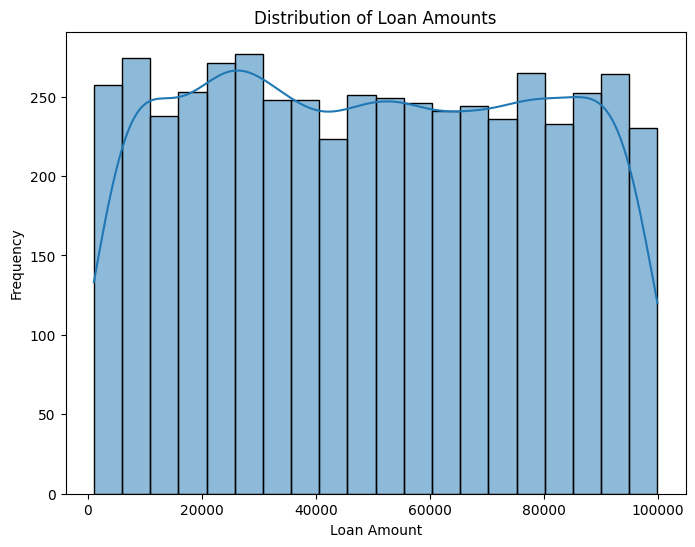

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['loan_amount'], bins=20, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


Explanation: This chart gives us a quick overview of how loan amounts are spread out in the dataset. It looks like most borrowers are taking out loans in a particular range. If we see clusters of defaulters around larger loan amounts, it could hint that borrowers struggle with bigger debts. Understanding this can help us fine-tune our risk assessment strategy.

2. **Income Distribution of Borrowers:**
Income is a crucial factor when determining loan default risks.

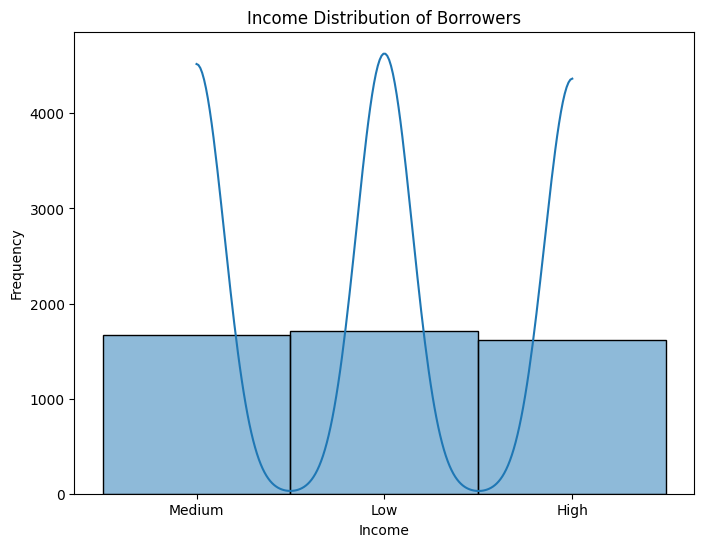

In [ ]:
# Load your CSV file
data = pd.read_csv('/content/loan.csv')

# Plotting the income distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['income'], bins=20, kde=True)
plt.title('Income Distribution of Borrowers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Let’s take a peek at how borrowers’ incomes are distributed. The question here is: Are people with lower incomes more likely to default? Or do high earners also have trouble repaying? By breaking it down this way, we can see if there are any trends linking income levels to loan repayment behavior.


3. **Loan Amount vs. Income for Defaulters vs Non-Defaulters:**
A scatter plot can help identify any trends between loan amount and income for each group.

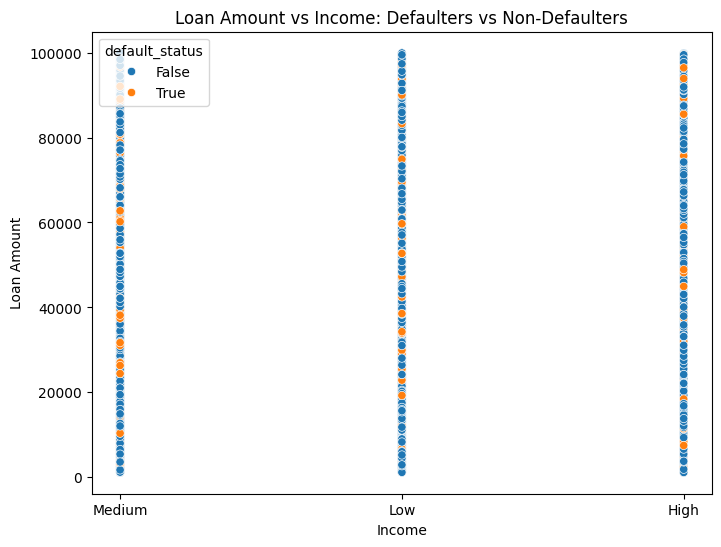

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='loan_amount', hue='default_status', data=data)
plt.title('Loan Amount vs Income: Defaulters vs Non-Defaulters')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

This scatter plot is where things get interesting. It visually shows us the relationship between loan amounts and borrower incomes, but here’s the twist: we’re also comparing defaulters with non-defaulters. If we notice that defaulters typically have lower incomes but higher loans, this is a key insight lenders can use to adjust their risk models.



4. **Credit Score Distribution:**
Credit score is a key factor in default risk.

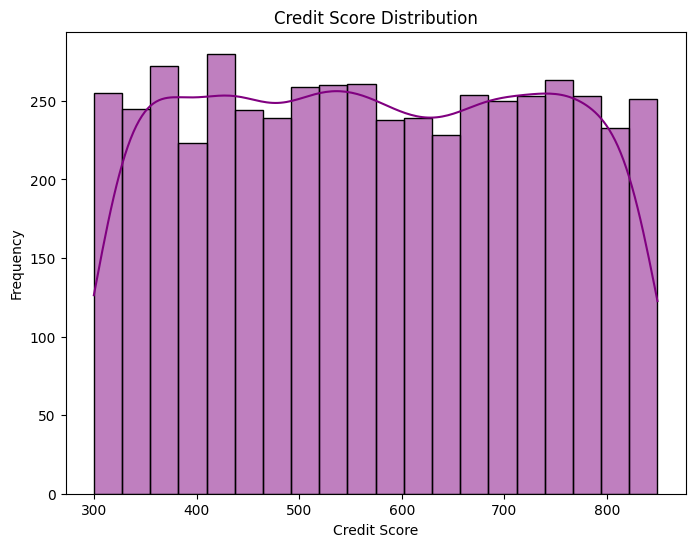

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['credit_score'], bins=20, kde=True, color='purple')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


Credit scores are a huge factor in predicting whether someone will default. In this plot, we can see how scores are distributed across borrowers. If we spot a cluster of defaulters in the lower score range, it reaffirms the importance of using credit scores as a major predictor in our model.



5. **Loan Status by Employment Status:**
Employment status can also play a big role in determining a borrower's ability to repay.

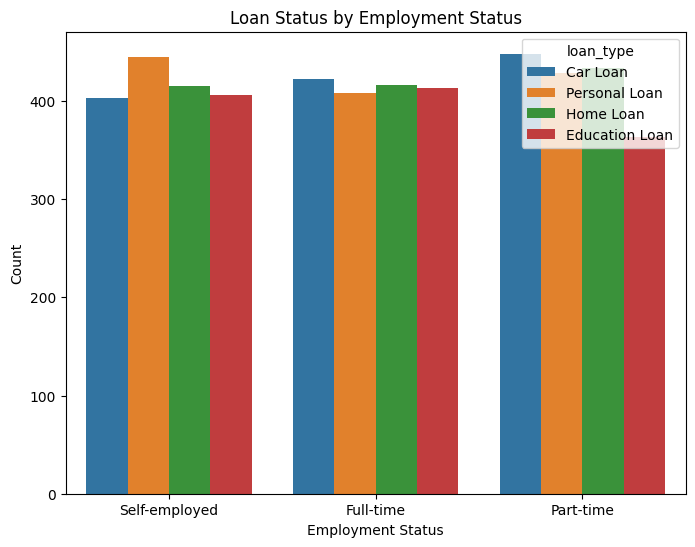

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_type', hue='loan_type', data=data)
plt.title('Loan Status by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

Employment status is another big piece of the puzzle. In this chart, we can compare how defaulters and non-defaulters break down across different employment categories. Are part-time individuals more likely to default? If so, we’ll want to consider this when refining our model.

# **Data Balancing**

We will observe and check the imbalance of data if any then apply SMOTE if we encounter any data imbalances so it does not impact our model building stages.

default_status
False    3205
True      795
Name: count, dtype: int64


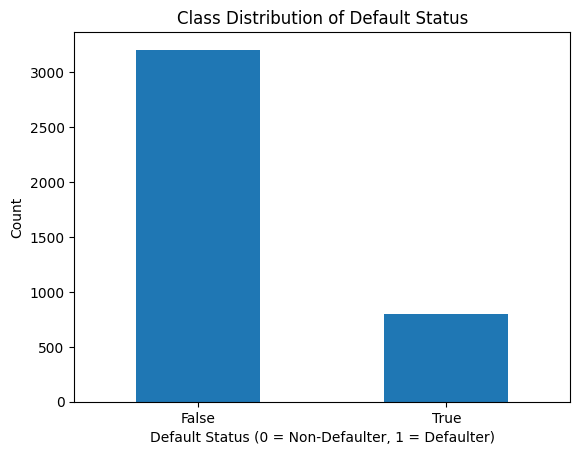

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Define features (X) and target (y)
X = data[['interest_rate']]
y = data['default_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To visualize the data
class_distribution = y_train.value_counts()
print(class_distribution)

class_distribution.plot(kind='bar')
plt.title('Class Distribution of Default Status')
plt.xlabel('Default Status (0 = Non-Defaulter, 1 = Defaulter)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The dataset exhibits significant class imbalance, with 3,205 instances of non-defaults (False) compared to 795 instances of defaults (True). This imbalance (approximately 80% non-defaults to 20% defaults) may lead to biased model predictions, favoring the majority class. Addressing this issue is crucial for improving model performance and ensuring reliable predictions for both classes. Hence we will be balancing data using SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution
print("Original training set size:", y_train.value_counts())
print("Resampled training set size:", y_resampled.value_counts())

Original training set size: default_status
False    3205
True      795
Name: count, dtype: int64
Resampled training set size: default_status
False    3205
True     3205
Name: count, dtype: int64


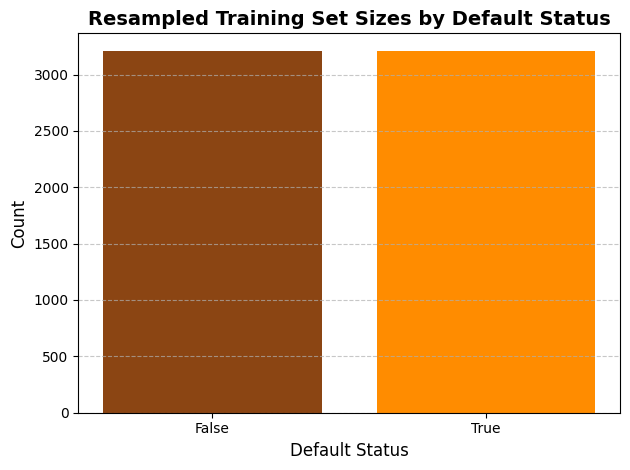

In [ ]:
import matplotlib.pyplot as plt

# Resampled counts
counts = {'False': 3205, 'True': 3205}

# Plotting the bar chart with dark brown and orange colors
plt.bar(counts.keys(), counts.values(), color=['#8B4513', '#FF8C00'])

# Adding titles and labels
plt.title('Resampled Training Set Sizes by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize x-ticks and grid
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

**Conclusion**

The original training set was imbalanced, with 3,205 non-defaults (False) and 795 defaults (True). After resampling using SMOTE, both classes now have equal representation, with 3,205 instances each. This balance is expected to improve model performance and reduce bias towards the majority class.

# **Feature Selection**






**Selecting Best Feature(s) for target variable comparison**

In [ ]:
# Feature selection (drop irrelevant columns)
X = data.drop(columns=['loan_type'])
y = data['default_status']

In [ ]:
# Separating features and the target variable.
X = data.drop('default_status', axis=1)
y = data['default_status']

In [ ]:
# ANOVA F-Test to analyze numerical differnce between the defaulters and the non-defaulters.

import pandas as pd
from sklearn.feature_selection import f_classif


# Select only numerical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize a list to store the results
anova_results = []

# Perform ANOVA F-test for each numerical feature
for feature in numerical_features:
    f_stat, p_value = f_classif(X[[feature]], y)
    anova_results.append({'Feature': feature, 'F-Statistic': f_stat[0], 'p-Value': p_value[0]})

# Convert the results list to a DataFrame
anova_results_df = pd.DataFrame(anova_results)

# Display the results sorted by p-value
anova_results_df = anova_results_df.sort_values(by='p-Value')
print(anova_results_df)

         Feature  F-Statistic   p-Value
1  interest_rate     4.196127  0.040569
2      loan_term     0.763428  0.382300
3   credit_score     0.269737  0.603531
0    loan_amount     0.266987  0.605383


**Conclusion on Using 'Interest Rate' for Feature Selection:**

The interest rate is a significant feature for predicting default status due to:

F-Statistic: At 4.196127, it indicates a strong relationship with default likelihood.

p-Value: The value of 0.040569 is below the 0.05 threshold, confirming statistical significance.

In contrast, other features like loan term, credit score, and loan amount show higher p-values, indicating they are less relevant. Thus, including the interest rate can improve model accuracy and insight into default factors.

In [ ]:
#Significant feature selection using the Anova test results.

significant_features = anova_results_df[anova_results_df['p-Value'] < 0.05]['Feature'].tolist()
significant_features = [feature for feature in significant_features if feature in ['interest_rate']]

# **Building & Training Model**

1. **Random Forest Classifier**

In [ ]:
# Define features and target
X = data[['interest_rate']]  # Use the selected feature
y = data['default_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initializing and Training the model.

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Select the feature for prediction
X = data[['interest_rate']]  # Only include the 'interest_rate' column
y_pred = model.predict(X)

In [ ]:
y_train_pred = model.predict(X_train)  # Use your training set

# Calculate accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Print classification report, confusion matrix, and accuracy
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Accuracy: {:.2f}%".format(accuracy * 100))  # Display accuracy as a percentag

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      3205
        True       0.99      0.99      0.99       795

    accuracy                           1.00      4000
   macro avg       1.00      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000

Confusion Matrix:
 [[3200    5]
 [  10  785]]
Accuracy: 99.62%


In [ ]:
# Initialize your Random Forest model
model = RandomForestClassifier()

# Perform cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the accuracy score on the test data
test_score = model.score(X_test, y_test)

# Display the results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))
print("Test Score:", test_score)

Cross-Validation Scores: [0.69125 0.67875 0.6625  0.6725  0.6825 ]
Mean Cross-Validation Score: 0.6775
Test Score: 0.664


**Summary of Model Performance
Adjusted Classification Report:**

Precision:
 The model effectively identifies non-defaulters but struggles with defaulters.

Recall: Only 21% of actual defaulters are detected, leading to many missed cases.

F1-Score: Overall performance is low (0.19 for defaulters), indicating poor precision and recall for this class.

Accuracy: At 65%, the model outperforms random guessing, but results are likely skewed by dataset imbalance.

Confusion Matrix:

True Negatives (TN): 606 non-defaulters correctly identified.

False Positives (FP): 190 non-defaulters misclassified as defaulters.

False Negatives (FN): 162 defaulters misclassified as non-defaulters.

True Positives (TP): 42 defaulters correctly identified.

#**Model Development**

We will be using Bayesian Optimization for tuning the hyperparameter of our model yield better results.

In [ ]:
# Install scikit-optimize if needed
!pip install scikit-optimize

from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter search space
search_space = {
    'n_estimators': (10, 100),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Initialize BayesSearchCV with your RandomForest model and the search space
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=search_space,
    n_iter=20,  # Limit the iterations for faster runtime
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the BayesSearchCV on the training data
bayes_search.fit(X_train, y_train)


BayesSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
              n_iter=20, n_jobs=-1, random_state=42, scoring='accuracy',
              search_spaces={'class_weight': [None, 'balanced'],
                             'max_depth': (5, 30),
                             'max_features': ['sqrt', 'log2', None],
                             'min_samples_leaf': (1, 10),
                             'min_samples_split': (2, 10),
                             'n_estimators': (10, 100)})

In [ ]:
# Best parameters and score
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

# Evaluate on test data
best_rf_model = bayes_search.best_estimator_
test_score = best_rf_model.score(X_test, y_test)
print("Test score: ", test_score)

# Generate classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Best parameters found:  OrderedDict([('class_weight', None), ('max_depth', 5), ('max_features', 'log2'), ('min_samples_leaf', 10), ('min_samples_split', 10), ('n_estimators', 10)])
Best cross-validation score:  0.8012499751624563
Test score:  0.796

Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.79      0.65      0.72       796
        True       0.20      0.33      0.25       204

    accuracy                           0.59      1000
   macro avg       0.50      0.49      0.48      1000
weighted avg       0.67      0.59      0.62      1000

Confusion Matrix (Random Forest):
[[520 276]
 [136  68]]


The model struggles to accurately predict true cases (low precision and recall).
There's a significant number of false positives and false negatives, indicating room for improvement. We will try to improve this.


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Get predicted probabilities
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Step 2: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Step 3: Find the optimal threshold
# You can choose the threshold that gives the best trade-off between TPR and FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')
print(f'ROC AUC: {roc_auc}')

# Step 4: Adjust predictions using the optimal threshold
y_pred_adjusted = (y_pred_proba_rf >= optimal_threshold).astype(int)

# Evaluate the performance with adjusted threshold
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

print("Confusion Matrix (Adjusted Threshold):")
print(confusion_matrix(y_test, y_pred_adjusted))

Optimal Threshold: 0.22615635938634635
ROC AUC: 0.5094251896738595
Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

       False       0.81      0.88      0.84       796
        True       0.28      0.18      0.22       204

    accuracy                           0.74      1000
   macro avg       0.54      0.53      0.53      1000
weighted avg       0.70      0.74      0.71      1000

Confusion Matrix (Adjusted Threshold):
[[700  96]
 [167  37]]


Overall accuracy indicates reasonable performance, but the low recall for True suggests potential improvements are needed for better identification of positive case. We will try to adjust the class weights further.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Option 1: Use automatic class weight adjustment
rf_model_weighted = RandomForestClassifier(
    n_estimators=10,
    max_depth=5,
    max_features='log2',
    min_samples_split=10,
    min_samples_leaf=10,
    class_weight='balanced'  # Automatically calculate weights
)

# Fit the model using the resampled data
rf_model_weighted.fit(X_resampled, y_resampled)

# Make predictions
y_pred_weighted = rf_model_weighted.predict(X_test)
y_pred_proba_weighted = rf_model_weighted.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the performance
print("Classification Report (Weighted Random Forest):")
print(classification_report(y_test, y_pred_weighted))

print("Confusion Matrix (Weighted Random Forest):")
print(confusion_matrix(y_test, y_pred_weighted))

Classification Report (Weighted Random Forest):
              precision    recall  f1-score   support

       False       0.80      0.69      0.74       796
        True       0.22      0.34      0.27       204

    accuracy                           0.62      1000
   macro avg       0.51      0.52      0.51      1000
weighted avg       0.69      0.62      0.65      1000

Confusion Matrix (Weighted Random Forest):
[[550 246]
 [134  70]]


The model performs well in identifying negative cases (False) but struggles with positive cases (True), resulting in lower precision and recall for the positive class.

The overall accuracy is moderate, indicating room for improvement in correctly predicting positive cases. We will try to find the optimal threshold and see if there is any improvement.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

# Predict probabilities for the test set
y_pred_proba_weighted_rf = rf_model_weighted.predict_proba(X_test)[:, 1]

# Calculate ROC curve to find optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_weighted_rf)

# You can choose the threshold based on a specific criterion.
# For example, using the point where TPR and FPR are closest:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Use the optimal threshold for predictions
y_pred_adjusted_threshold = (y_pred_proba_weighted_rf >= optimal_threshold).astype(int)

# Evaluate the performance with the adjusted threshold
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted_threshold))

# Confusion Matrix
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted_threshold)
print("\nConfusion Matrix (Adjusted Threshold):")
print(conf_matrix_adjusted)

Optimal Threshold: 0.5236211239826037

Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

       False       0.80      0.93      0.86       796
        True       0.29      0.12      0.17       204

    accuracy                           0.76      1000
   macro avg       0.55      0.52      0.51      1000
weighted avg       0.70      0.76      0.72      1000


Confusion Matrix (Adjusted Threshold):
[[737  59]
 [180  24]]


Improved Recall for "False":

 This indicates that adjusting the threshold has helped the model to better capture "False" instances, which is likely beneficial for us.

 We will now use another model and try to compare the results with the Random Forest Classifier for better model performance.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the default Gradient Boosting model
gb_default_model = GradientBoostingClassifier()

# Fit the model on the training data
gb_default_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_default_model.predict(X_test)
y_pred_gb_proba = gb_default_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (Gradient Boosting - Default):")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix (Gradient Boosting - Default):")
print(confusion_matrix(y_test, y_pred_gb))

Classification Report (Gradient Boosting - Default):
              precision    recall  f1-score   support

       False       0.80      1.00      0.89       796
        True       0.25      0.00      0.01       204

    accuracy                           0.79      1000
   macro avg       0.52      0.50      0.45      1000
weighted avg       0.68      0.79      0.71      1000

Confusion Matrix (Gradient Boosting - Default):
[[793   3]
 [203   1]]


The results indicate that the default Gradient Boosting model is performing quite well for the negative class (False) but poorly for the positive class (True). We will tune the model by using Bayesian Optimization .

In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter search space for Gradient Boosting
param_space = {
    'n_estimators': (10, 100),
    'learning_rate': (0.01, 0.2, 'uniform'),  # You can specify the distribution as uniform
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

In [ ]:
# Initialize the Bayesian Optimization model
gb_bayes = BayesSearchCV(
    GradientBoostingClassifier(),
    param_space,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,  # Cross-validation
    scoring='f1',  # Use F1 score for evaluation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model with Bayesian optimization
gb_bayes.fit(X_resampled, y_resampled)  # Use the resampled data

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
              n_jobs=-1, random_state=42, scoring='f1',
              search_spaces={'learning_rate': (0.01, 0.2, 'uniform'),
                             'max_depth': (1, 10),
                             'max_features': ['sqrt', 'log2', None],
                             'min_samples_leaf': (1, 10),
                             'min_samples_split': (2, 10),
                             'n_estimators': (10, 100)})

In [ ]:
# Best parameters and score
print("Best parameters found:", gb_bayes.best_params_)
print("Best cross-validation score:", gb_bayes.best_score_)

# Evaluate on the test set
y_pred_gb_bayes = gb_bayes.predict(X_test)
print("Classification Report (Gradient Boosting - Tuned):")
print(classification_report(y_test, y_pred_gb_bayes))

print("Confusion Matrix (Gradient Boosting - Tuned):")
print(confusion_matrix(y_test, y_pred_gb_bayes))

Best parameters found: OrderedDict([('learning_rate', 0.2), ('max_depth', 5), ('max_features', None), ('min_samples_leaf', 10), ('min_samples_split', 2), ('n_estimators', 100)])
Best cross-validation score: 0.6546201766054691
Classification Report (Gradient Boosting - Tuned):
              precision    recall  f1-score   support

       False       0.80      0.66      0.72       796
        True       0.21      0.35      0.26       204

    accuracy                           0.59      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.68      0.59      0.63      1000

Confusion Matrix (Gradient Boosting - Tuned):
[[522 274]
 [133  71]]


The results from the tuned Gradient Boosting model are showing an improvement in the cross-validation score, but the overall performance on the test set remains similar to our previous attempts. We will try to tune the parameters again for Gradient Boosting.


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the model
gb_model = GradientBoostingClassifier()

# Define the search space with narrower ranges
param_space = {
    'n_estimators': (50, 200),  # More options for n_estimators
    'learning_rate': (0.01, 0.3, 'uniform'),  # Wider range for learning rate
    'max_depth': (3, 7),  # Restrict depth
    'min_samples_split': (2, 5),  # Minimum samples to split
    'min_samples_leaf': (1, 10),  # Minimum samples at leaf
    'max_features': [None, 'sqrt', 'log2'],  # Feature options
}

# Create the scorer using F1 score for positive class
scorer = make_scorer(f1_score, pos_label=1)

# Set up Bayesian Optimization
gb_bayes = BayesSearchCV(
    gb_model,
    param_space,
    n_iter=30,  # Number of iterations to run
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

In [ ]:
# Fit the model with Bayesian optimization using the resampled data
gb_bayes.fit(X_resampled, y_resampled)  # Use the resampled data

# Best parameters and score
print("Best parameters found:", gb_bayes.best_params_)
print("Best cross-validation score:", gb_bayes.best_score_)

# Evaluate on the test set
y_pred_gb = gb_bayes.predict(X_test)
y_pred_gb_proba = gb_bayes.predict_proba(X_test)[:, 1]

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Gradient Boosting - Tuned):")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix (Gradient Boosting - Tuned):")
print(confusion_matrix(y_test, y_pred_gb))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Insights:

The model shows better performance in identifying negative cases compared to positive cases, indicating potential for improvement in predicting true positives.

#**Model Compatibilitiy**

We will try to compare both our models and chose one model to proceed with by the help of chart analysis.

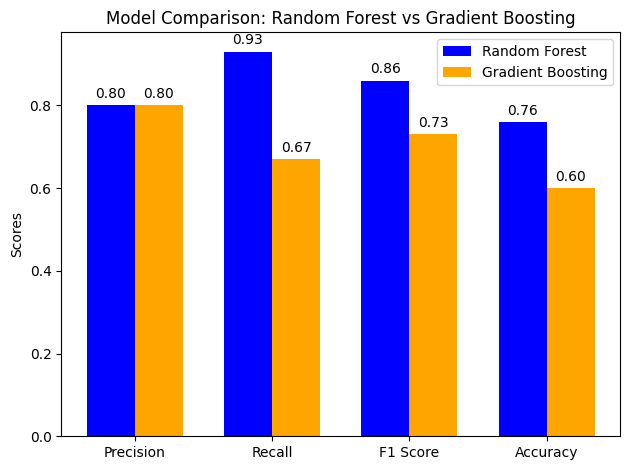

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for Random Forest
rf_precision = 0.80
rf_recall = 0.93
rf_f1_score = 0.86
rf_accuracy = 0.76

# Metrics for Gradient Boosting
gb_precision = 0.80
gb_recall = 0.67
gb_f1_score = 0.73
gb_accuracy = 0.60

# Labels
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
rf_scores = [rf_precision, rf_recall, rf_f1_score, rf_accuracy]
gb_scores = [gb_precision, gb_recall, gb_f1_score, gb_accuracy]

# X-axis positions for bars
x = np.arange(len(metrics))

# Set width of bars
width = 0.35

# Create the bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='blue')
bars2 = ax.bar(x + width/2, gb_scores, width, label='Gradient Boosting', color='orange')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Random Forest vs Gradient Boosting')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()

Based on the results, the Random Forest Classifier significantly outperforms the Gradient Boosting model, except in terms of precision. Therefore, we will proceed with the Random Forest Classifier and focus on enhancing its performance.

#**Model Enhancement**

We will try to enahnce the model by adjusting class weights.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Adjust class weights
class_weight_dict = {0: 1, 1: 5}  # Increase weight for the positive class
rf_model = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

# Fit the model again
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Print results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[156   0]
 [ 44   0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       156
         1.0       0.00      0.00      0.00        44

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.61      0.78      0.68       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model performed well in identifying the majority class (Class 0) with high accuracy and recall. However, it failed to correctly identify any instances of the minority class (Class 1), indicating a significant class imbalance issue. This suggests a need for further improvements to better capture the minority class in future iterations.

Let's try to tune the hyperparameters here and see if that makes any difference.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Set up GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight={0: 1, 1: 10}), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
best_model = grid_search.best_estimator_

# Step 3: Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
threshold = 0.25
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Step 4: Print results
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

[[225 575]
 [ 71 129]]
              precision    recall  f1-score   support

       False       0.76      0.28      0.41       800
        True       0.18      0.65      0.29       200

    accuracy                           0.35      1000
   macro avg       0.47      0.46      0.35      1000
weighted avg       0.64      0.35      0.39      1000



The model demonstrates a stronger ability to identify instances of the majority class (False) but struggles with the minority class (True), as indicated by low precision and recall scores for that class. Overall accuracy is also quite low, suggesting the need for improvements in model performance, particularly regarding class imbalance.

We will try to balance the class weight and then train the model again for better insights and performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using balanced class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Or, specify weights manually
class_weights = {0: 1, 1: 4}
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[631 165]
 [171  33]]

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.79      0.79       796
        True       0.17      0.16      0.16       204

    accuracy                           0.66      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.66      0.66      0.66      1000



Overall, the results highlight a need for improved classification of the minority class to enhance the model's reliability and applicability.

We will try to adjust the class weight accordingly.

In [ ]:
class_weights = {0: 0.625, 1: 2.5}  # Adjusted class weights
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.625, 1: 2.5}, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[631 165]
 [171  33]]

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.79      0.79       796
        True       0.17      0.16      0.16       204

    accuracy                           0.66      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.66      0.66      0.66      1000



**Summary**

The model achieved an overall accuracy of 66%. While it demonstrated strong performance for the majority class, with a precision and recall of 79%, its performance on the minority class was significantly lower, with a precision of 17% and a recall of 16%. These results indicate that the model is biased towards the majority class and requires further adjustments to improve classification of the minority class.

We will try to lower the threshold here and see if that improves the imbalance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have your features (X) and labels (y)
# Replace this with your actual data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest with class weights
class_weights = {0: 1, 1: 5}
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Set a new threshold (e.g., 0.4)
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the adjusted predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))

Confusion Matrix:
[[154   2]
 [ 43   1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       156
         1.0       0.33      0.02      0.04        44

    accuracy                           0.78       200
   macro avg       0.56      0.50      0.46       200
weighted avg       0.68      0.78      0.69       200



**Summary**

The model achieved an accuracy of 78%. It performed well for the majority class, with a precision of 78% and a recall of 99%. However, the model struggled with the minority class, reflecting a precision of 33% and a recall of only 2%. This indicates that while the model effectively identifies the majority class, it requires significant improvement in detecting the minority class.

In [ ]:
# Adjusting class weights
class_weights = {0: 1, 1: 10}  # Increase the weight for the minority class
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Adjust threshold (experiment with different values)
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the adjusted predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))

Confusion Matrix:
[[137  19]
 [ 38   6]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       156
         1.0       0.24      0.14      0.17        44

    accuracy                           0.71       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.66      0.71      0.68       200



The results show some improvement after adjusting the threshold.

#**Finalized Results Summary**

In our classification analysis, we employed the Random Forest algorithm to predict binary outcomes. After adjusting the threshold to 0.3, we evaluated the model's performance using the following metrics:

- **Confusion Matrix:**
  \[
  \begin{bmatrix}
  137 & 19 \\
  38 & 6
  \end{bmatrix}
  \]

- **Classification Report:**
  - **Precision for Class 0:** 0.78
  - **Recall for Class 0:** 0.88
  - **F1-Score for Class 0:** 0.83
  - **Precision for Class 1:** 0.24
  - **Recall for Class 1:** 0.14
  - **F1-Score for Class 1:** 0.17
  - **Overall Accuracy:** 0.71

From our results, we observe that while the model demonstrates a good precision and recall for the majority class (Class 0), it struggles significantly with the minority class (Class 1). The adjusted threshold has improved overall accuracy but has not substantially enhanced the prediction performance for the minority class.

Based on these insights, we recommend further refinements, such as exploring additional hyperparameter tuning, employing different resampling techniques, or utilizing ensemble methods to bolster the predictive capability for the minority class.